## PCA
Principal component analysis 用於降於資料的維度，同時保持資料中的對variance貢獻最大的feature。

這是通過保留低階主成分，忽略高階主成分做到的。這樣低階成分往往能夠保留住數據的最重要方面

In [3]:
from __future__ import print_function, division

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting style defaults
import seaborn as sns; sns.set()

/projects/sage/sage-6.10/local/lib/python2.7/site-packages/matplotlib-1.5.0-py2.7-linux-x86_64.egg/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


為了視覺化方便，我們同樣採產生用二維的資料點

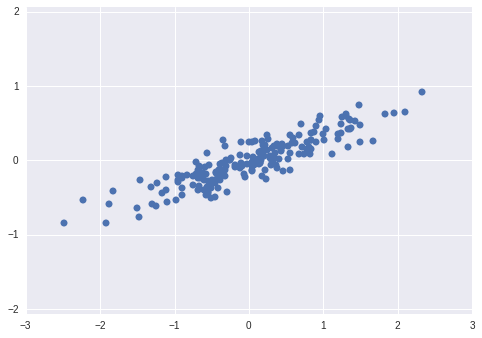

In [4]:
np.random.seed(1)
X = np.dot(np.random.random(size=(2, 2)), np.random.normal(size=(2, 200))).T # Y=WX
plt.plot(X[:, 0], X[:, 1], 'o')
plt.axis('equal');

我們可以看到我們建構出來的資料點有明顯的趨勢，PCA所做的事就是去尋找資料點中的Principle Axes， 然後用這些這些重要的axes 去解釋資料分布。

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)
print(pca.explained_variance_)
print(pca.components_)

[ 0.75871884  0.01838551]
[[ 0.94446029  0.32862557]
 [ 0.32862557 -0.94446029]]


把上述數據畫在二維平面上，來看看他們代表什麼涵義!

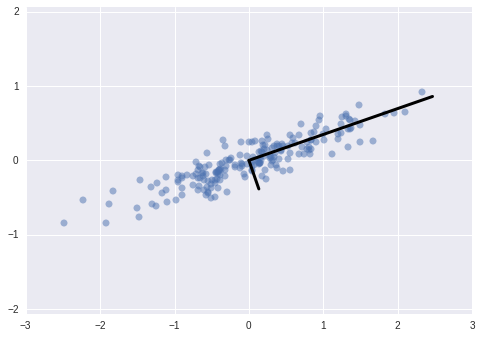

In [6]:
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.5)  #使資料點顏色變淡
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    plt.plot([0, v[0]], [0, v[1]], '-k', lw=3)
plt.axis('equal');

注意其中一個vector比另一個長，這告訴我們該方向上的data趨勢比其他方向更重要， ``explained variance`` 這個欄位量化的某方向的重要性。
進一步來說，短的principal component在此情況可以忽略，而不會失去太多data隱含的訊息。
讓我們進一步實驗:

In [7]:
clf = PCA(0.95) # keep 95% of variance
X_trans = clf.fit_transform(X)
print(X.shape)
print(X_trans.shape)

(200, 2)
(200, 1)


在保有95的variance下，我們成功降維了!!
讓我們看看降維後的數據樣子:

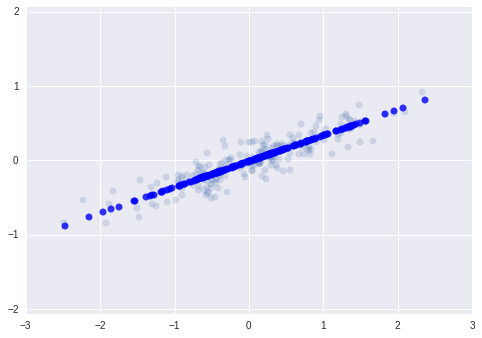

In [8]:
X_new = clf.inverse_transform(X_trans)
plt.plot(X[:, 0], X[:, 1], 'o', alpha=0.2)
plt.plot(X_new[:, 0], X_new[:, 1], 'ob', alpha=0.8)
plt.axis('equal');

同樣的我們使原來的data顏色變淡，讓投影到principal axes的主資料點呈現深色。 我們可以看出最重要的趨勢(feature)被保留下來了! 
這就是 "dimensionality reduction" 的功用!

## Application of PCA to Digits
讓我們用數字辨識資料庫來看看PCA的效果。他在對高維資料進行視覺化處理時很有效!

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

In [10]:
pca = PCA(2)  # project from 64 to 2 dimensions
Xproj = pca.fit_transform(X) 
print(X.shape)
print(Xproj.shape)

(1797, 64)
(1797, 2)


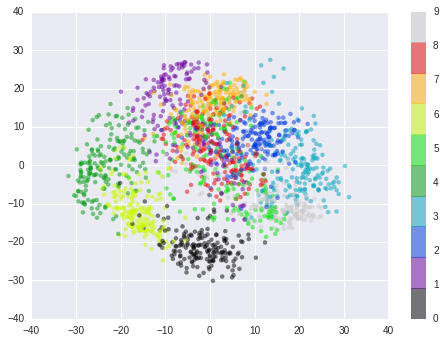

In [11]:
plt.scatter(Xproj[:, 0], Xproj[:, 1], c=y, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar();

可以看的出來我們還是能區別各個數字的特性

以下範例說明我們只需六個維度的資料就可以做出不錯相近原始資料的數字!! 所以PCA在此也可以被看做loosy的 compression

None

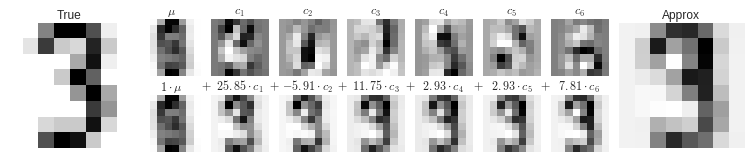

In [13]:
from fig_code.figures import plot_pca_interactive
plot_pca_interactive(digits.data)

## Choosing the Number of Components
實務上要怎麼選擇我們需要多少個維度來描述原本資料才合理呢?
我們可以觀察 ``explained variance``和維度的關係如下

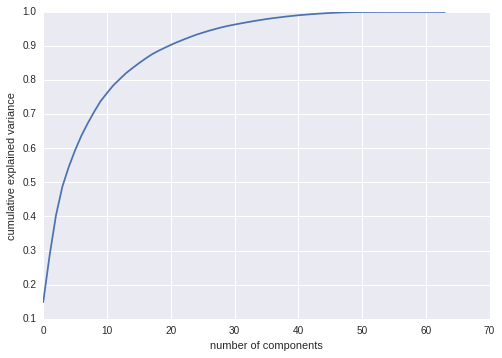

In [10]:
sns.set()
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

上圖告訴我們，以統計的觀點來說我們要保留90%的variance的話，大概需要20個維度

我們用圖片來觀察維度變化對於數字的影響如下

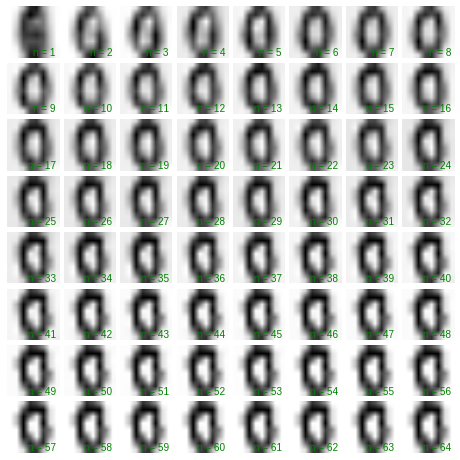

In [14]:
fig, axes = plt.subplots(8, 8, figsize=(8, 8))
fig.subplots_adjust(hspace=0.1, wspace=0.1)

for i, ax in enumerate(axes.flat):
    pca = PCA(i + 1).fit(X)
    im = pca.inverse_transform(pca.transform(X[20:21]))

    ax.imshow(im.reshape((8, 8)), cmap='binary')
    ax.text(0.95, 0.05, 'n = {0}'.format(i + 1), ha='right',
            transform=ax.transAxes, color='green')
    ax.set_xticks([])
    ax.set_yticks([])

None

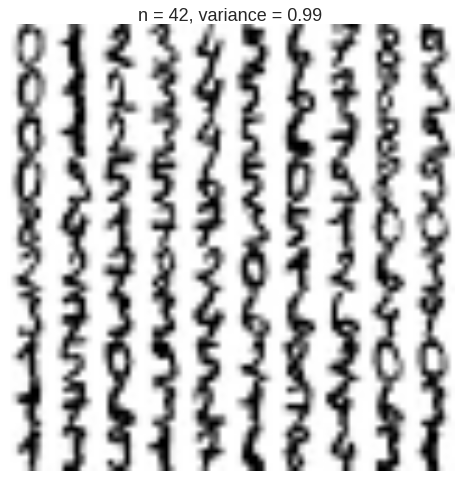

In [15]:
from IPython.html.widgets import interact

def plot_digits(n_components):
    fig = plt.figure(figsize=(8, 8))
    plt.subplot(1, 1, 1, frameon=False, xticks=[], yticks=[])
    nside = 10
    
    pca = PCA(n_components).fit(X)
    Xproj = pca.inverse_transform(pca.transform(X[:nside ** 2]))
    Xproj = np.reshape(Xproj, (nside, nside, 8, 8))
    total_var = pca.explained_variance_ratio_.sum()
    
    im = np.vstack([np.hstack([Xproj[i, j] for j in range(nside)])
                    for i in range(nside)])
    plt.imshow(im)
    plt.grid(False)
    plt.title("n = {0}, variance = {1:.2f}".format(n_components, total_var),
                 size=18)
    plt.clim(0, 16)
    
interact(plot_digits, n_components=[1, 64], nside=[1, 8]);

## The End

歡迎來到ML jungle!

如果有興趣繼續用sklearn可以參考 tutorial http://scikit-learn.org/stable/tutorial/index.html 和 http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html
